In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('toyota.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089.0,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615.0,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469.0,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736.0,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284.0,Petrol,145,36.2,2.0


In [3]:
data = data.drop_duplicates()

In [4]:
X=data.iloc[:,[0,1,2,3,5,6,7,8]]
Y=data.iloc[:,4]
print("For X: \n",X.isnull().sum())
print("For Y: ",Y.isnull().sum())

For X: 
 model           0
year            0
price           0
transmission    0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
For Y:  103


In [5]:
Y_mean=data['mileage'].mean()
print("Mean is : ",Y_mean)
Y=Y.fillna(Y_mean)
print("For Y: ",Y.isnull().sum())
X.head()

Mean is :  22892.94176524113
For Y:  0


,model,year,price,transmission,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,Petrol,145,36.2,2.0


In [6]:
from sklearn.preprocessing import LabelEncoder
Lb_model = LabelEncoder()
X.iloc[:,0] = Lb_model.fit_transform(X.iloc[:,0])
Lb_trans = LabelEncoder()
X.iloc[:,3] = Lb_trans.fit_transform(X.iloc[:,3])
Lb_ = LabelEncoder()
X.iloc[:,4] = Lb_trans.fit_transform(X.iloc[:,4])
X.head()

C:\Users\dheer\dhpython\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,model,year,price,transmission,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,3,265,36.2,2.0
1,6,2017,15995,1,3,145,36.2,2.0
2,6,2015,13998,1,3,265,36.2,2.0
3,6,2017,18998,1,3,150,36.2,2.0
4,6,2017,17498,1,3,145,36.2,2.0


In [7]:
corre = X.corr()
corre

,model,year,price,transmission,fuelType,tax,mpg,engineSize
model,1.000000,-0.034387,0.028002,-0.067418,-0.002232,0.032084,-0.134041,0.217742
year,-0.034387,1.000000,0.422832,0.023453,0.094989,0.282674,-0.019395,-0.041637
price,0.028002,0.422832,1.000000,-0.338037,-0.516962,0.215386,-0.039730,0.728783
transmission,-0.067418,0.023453,-0.338037,1.000000,0.508737,0.175913,-0.321016,-0.403082
fuelType,-0.002232,0.094989,-0.516962,0.508737,1.000000,0.107514,-0.295948,-0.710097
tax,0.032084,0.282674,0.215386,0.175913,0.107514,1.000000,-0.429367,0.157539
mpg,-0.134041,-0.019395,-0.039730,-0.321016,-0.295948,-0.429367,1.000000,-0.107100
engineSize,0.217742,-0.041637,0.728783,-0.403082,-0.710097,0.157539,-0.107100,1.000000


In [8]:
ind = np.where(corre>0.7)
ind = np.array(ind)
del_ind=[]
for i in range(0,10):
    if ind[0,i]>ind[1,i]:
        del_ind.append(ind[1,i])
del_ind = np.unique(np.array(del_ind))
print(del_ind)
X = np.array(X)
X = np.delete(X,del_ind,axis=1)
# X = X.astype(int)
X.shape

[2]


(6697, 7)

In [9]:
ind

array([[0, 1, 2, 2, 3, 4, 5, 6, 7, 7],
       [0, 1, 2, 7, 3, 4, 5, 6, 2, 7]], dtype=int64)

In [10]:
Y=np.array(Y)
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)


In [11]:
#Linear Regression
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,Y_train)
Y_pred = Lr.predict(X_test)

In [12]:
corr_coef = np.corrcoef(Y_test,Y_pred)
mse_l = mse(Y_test,Y_pred)
print("Mean Squared Error is: ",mse_l)
print("Correlation coefficient is: ",corr_coef[0][1])
print(np.concatenate((Y_pred[:5].reshape(len(Y_pred[:5]),1),Y_test[:5].reshape(len(Y_test[:5]),1)),axis=1))

Mean Squared Error is:  162462925.3628971
Correlation coefficient is:  0.7382577164124811
[[61387.58930127 99600.        ]
 [22320.28760554 26264.        ]
 [28285.43414557 36000.        ]
 [28321.23087389 57423.        ]
 [ 7106.18605468 22892.94176524]]


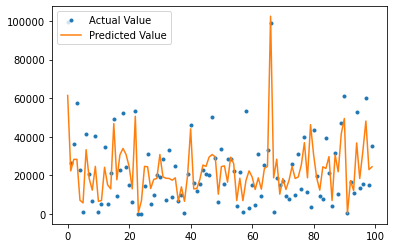

In [13]:
plt.plot(Y_test[:100],'.',label="Actual Value")
plt.plot(Y_pred[:100],label="Predicted Value")
plt.legend()

In [14]:
#Random Forest Regresion
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(n_estimators = 5,random_state = 0)
rand.fit(X_test,Y_test)
Y_pred=rand.predict(X_test)

In [15]:
corr_coef = np.corrcoef(Y_test,Y_pred)
mse_r = mse(Y_test,Y_pred)
print("Mean Squared Error is: ",mse_r)
print("Correlation coefficient is: ",corr_coef[0][1])
print(np.concatenate((Y_pred[:5].reshape(len(Y_pred[:5]),1),Y_test[:5].reshape(len(Y_test[:5]),1)),axis=1))

Mean Squared Error is:  107693287.48301084
Correlation coefficient is:  0.8357694123410127
[[99600.         99600.        ]
 [24117.77533147 26264.        ]
 [40538.08242424 36000.        ]
 [46870.13333333 57423.        ]
 [10051.67472358 22892.94176524]]


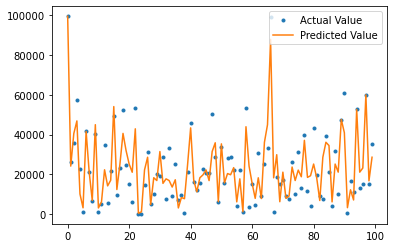

In [16]:
plt.plot(Y_test[:100],'.',label="Actual Value")
plt.plot(Y_pred[:100],label="Predicted Value")
plt.legend()